# Analizando la obesidad en Inglaterra usando Python y Pandas

### Se importa las librerías a utilizar

In [1]:
#Se importa pandas, matplotlib y numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Se lee los datos de la hoja de cálculo

In [2]:
#Se abre el archivo de datos de obesidad del año 2014
data = pd.ExcelFile("./Data/Obes-phys-acti-diet-eng-2014-tab.xls")

### Hojas que tiene la hoja de cálculo

In [3]:
#Se muestra los nombres de las hojas de calculo del archivo de excel
print (data.sheet_names)

['Chapter 7', '7.1', '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '7.10']


### Limpieza 

In [4]:
#Se lee la segunda sección, por edad.
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)
print (data_age)

   Unnamed: 0    Total  Under 16  16-24   25-34   35-44   45-54   55-64  \
0         NaN      NaN       NaN    NaN     NaN     NaN     NaN     NaN   
1     2002/03   1275.0     400.0   65.0   136.0   289.0   216.0    94.0   
2     2003/04   1711.0     579.0   67.0   174.0   391.0   273.0   151.0   
3     2004/05   2035.0     547.0  107.0   287.0   487.0   364.0   174.0   
4     2005/06   2564.0     583.0   96.0   341.0   637.0   554.0   258.0   
5     2006/07   3862.0     656.0  184.0   461.0  1069.0   872.0   459.0   
6     2007/08   5018.0     747.0  228.0   564.0  1469.0  1198.0   598.0   
7     2008/09   7988.0     775.0  322.0  1013.0  2359.0  2133.0  1099.0   
8     2009/10  10571.0     632.0  361.0  1348.0  3132.0  3076.0  1555.0   
9     2010/11  11574.0     525.0  375.0  1425.0  3277.0  3573.0  1820.0   
10    2011/12  11736.0     495.0  391.0  1484.0  3104.0  3581.0  2119.0   
11    2012/13  10957.0     556.0  356.0  1437.0  2744.0  3305.0  1965.0   

    65-74  75 and over  

### Se renombra Unnamed a Año

In [5]:
data_age.rename(columns={u'Unnamed: 0': u'Año'}, inplace=True)

### Se elimina campos con NAN y se resetea el Indice

In [6]:
data_age.dropna(inplace=True)
data_age.set_index('Año', inplace=True)
print ("Después de la limpieza de datos:")
print (data_age)

Después de la limpieza de datos:
           Total  Under 16  16-24   25-34   35-44   45-54   55-64  65-74  \
Año                                                                        
2002/03   1275.0     400.0   65.0   136.0   289.0   216.0    94.0   52.0   
2003/04   1711.0     579.0   67.0   174.0   391.0   273.0   151.0   52.0   
2004/05   2035.0     547.0  107.0   287.0   487.0   364.0   174.0   36.0   
2005/06   2564.0     583.0   96.0   341.0   637.0   554.0   258.0   72.0   
2006/07   3862.0     656.0  184.0   461.0  1069.0   872.0   459.0  118.0   
2007/08   5018.0     747.0  228.0   564.0  1469.0  1198.0   598.0  157.0   
2008/09   7988.0     775.0  322.0  1013.0  2359.0  2133.0  1099.0  221.0   
2009/10  10571.0     632.0  361.0  1348.0  3132.0  3076.0  1555.0  378.0   
2010/11  11574.0     525.0  375.0  1425.0  3277.0  3573.0  1820.0  456.0   
2011/12  11736.0     495.0  391.0  1484.0  3104.0  3581.0  2119.0  468.0   
2012/13  10957.0     556.0  356.0  1437.0  2744.0  3305

### Se renombra las columnas de Inglés a Español

In [7]:
data_age.rename(columns={u'Year':u'Año',u'Under 16':u'Menores de 16',u'75 and over':u'Mayores de 75'}, inplace=True)
print (data_age)

           Total  Menores de 16  16-24   25-34   35-44   45-54   55-64  65-74  \
Año                                                                             
2002/03   1275.0          400.0   65.0   136.0   289.0   216.0    94.0   52.0   
2003/04   1711.0          579.0   67.0   174.0   391.0   273.0   151.0   52.0   
2004/05   2035.0          547.0  107.0   287.0   487.0   364.0   174.0   36.0   
2005/06   2564.0          583.0   96.0   341.0   637.0   554.0   258.0   72.0   
2006/07   3862.0          656.0  184.0   461.0  1069.0   872.0   459.0  118.0   
2007/08   5018.0          747.0  228.0   564.0  1469.0  1198.0   598.0  157.0   
2008/09   7988.0          775.0  322.0  1013.0  2359.0  2133.0  1099.0  221.0   
2009/10  10571.0          632.0  361.0  1348.0  3132.0  3076.0  1555.0  378.0   
2010/11  11574.0          525.0  375.0  1425.0  3277.0  3573.0  1820.0  456.0   
2011/12  11736.0          495.0  391.0  1484.0  3104.0  3581.0  2119.0  468.0   
2012/13  10957.0          55

### Se genera la gráfica por edades

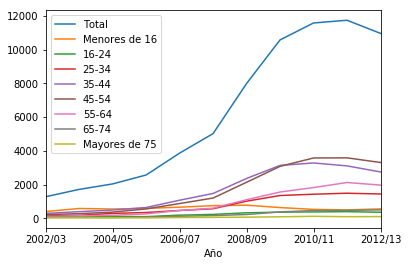

In [8]:
data_age.plot()
plt.show()

### Se elimina la columna total

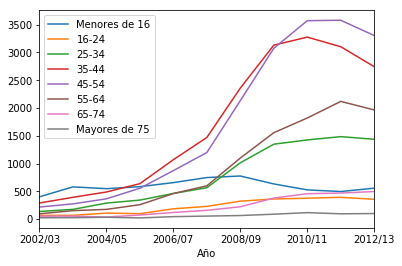

In [9]:
data_age_minus_total = data_age.drop('Total', axis=1)
data_age_minus_total.plot()
plt.show()

### Se  gráfica Niños versus Adultos

<p>Se requiere averiguar si los niños están pasando a ser obesos</p>

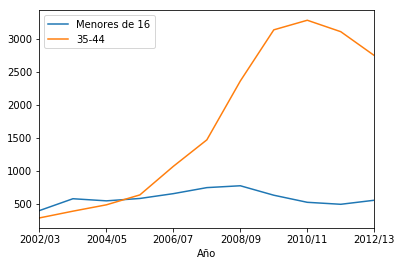

In [10]:
#Graficar niños vs adultos
data_age['Menores de 16'].plot(label="Menores de 16")
data_age['35-44'].plot(label="35-44")
plt.legend(loc="upper left")
plt.show()

### Haciendo predicción del futuro

### Se ajusta el valor polinomial a 3 y se ve el comportamiento de las dos curvas

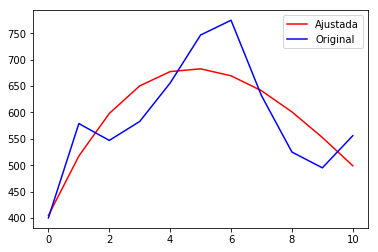

In [11]:
kids_values = data_age['Menores de 16'].values
x_axis = range(len(kids_values))
poly_degree = 3
curve_fit = np.polyfit(x_axis, kids_values, poly_degree)
poly_interp = np.poly1d(curve_fit)
poly_fit_values = []

for i in range(len(x_axis)):
    poly_fit_values.append(poly_interp(i))

plt.close()
plt.plot(x_axis, poly_fit_values, "-r", label = "Ajustada")
plt.plot(x_axis, kids_values, "-b", label = "Original")

plt.legend(loc="upper right")
plt.show()

### Se observa que la gráfica no tiene un buen ajuste, se prueba con un valor polinomial de 5.

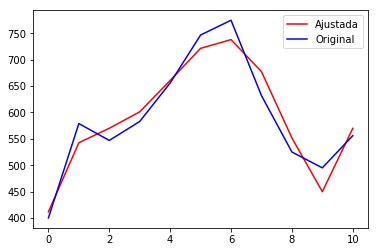

In [12]:
kids_values = data_age['Menores de 16'].values
x_axis = range(len(kids_values))
poly_degree = 5
curve_fit = np.polyfit(x_axis, kids_values, poly_degree)
poly_interp = np.poly1d(curve_fit)
poly_fit_values = []

for i in range(len(x_axis)):
    poly_fit_values.append(poly_interp(i))

plt.close()
plt.plot(x_axis, poly_fit_values, "-r", label = "Ajustada")
plt.plot(x_axis, kids_values, "-b", label = "Original")

plt.legend(loc="upper right")
plt.show()

### Se observa que la gráfica se acerca al ajuste, se prueba con un valor polinomial de 7.

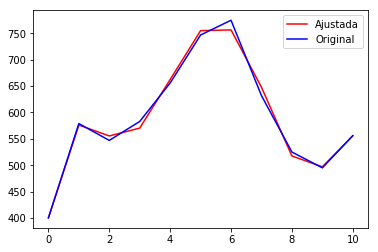

In [13]:
kids_values = data_age['Menores de 16'].values
x_axis = range(len(kids_values))
poly_degree = 7
curve_fit = np.polyfit(x_axis, kids_values, poly_degree)
poly_interp = np.poly1d(curve_fit)
poly_fit_values = []

for i in range(len(x_axis)):
    poly_fit_values.append(poly_interp(i))

plt.close()
plt.plot(x_axis, poly_fit_values, "-r", label = "Ajustada")
plt.plot(x_axis, kids_values, "-b", label = "Original")

plt.legend(loc="upper right")
plt.show()

<p> Ya se tiene un ajuste de las dos gráficas casi perfecto</p>

### Enlaces:

* https://realpython.com/analyzing-obesity-in-england-with-python/
* https://data.gov.uk/dataset/a7fb45df-7566-488b-80d8-a5dd5e52ff32/statistics-on-obesity-physical-activity-and-diet-england
* http://webarchive.nationalarchives.gov.uk/20180104154055/http://digital.nhs.uk/catalogue/PUB23742
* http://webarchive.nationalarchives.gov.uk/20180104154055/http://digital.nhs.uk/media/30782/Statistics-on-Obesity-Physical-Activity-and-Diet-England-2017-Data-tables/Any/obes-phys-acti-diet-eng-2017-tab
* https://github.com/shantnu/python-obesity